In [1]:
from simulation import monte_carlo_simulation
from plane import Plane
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
import os
os.environ['MKL_DISABLE_FAST_MM'] = '1'

# Single simulation

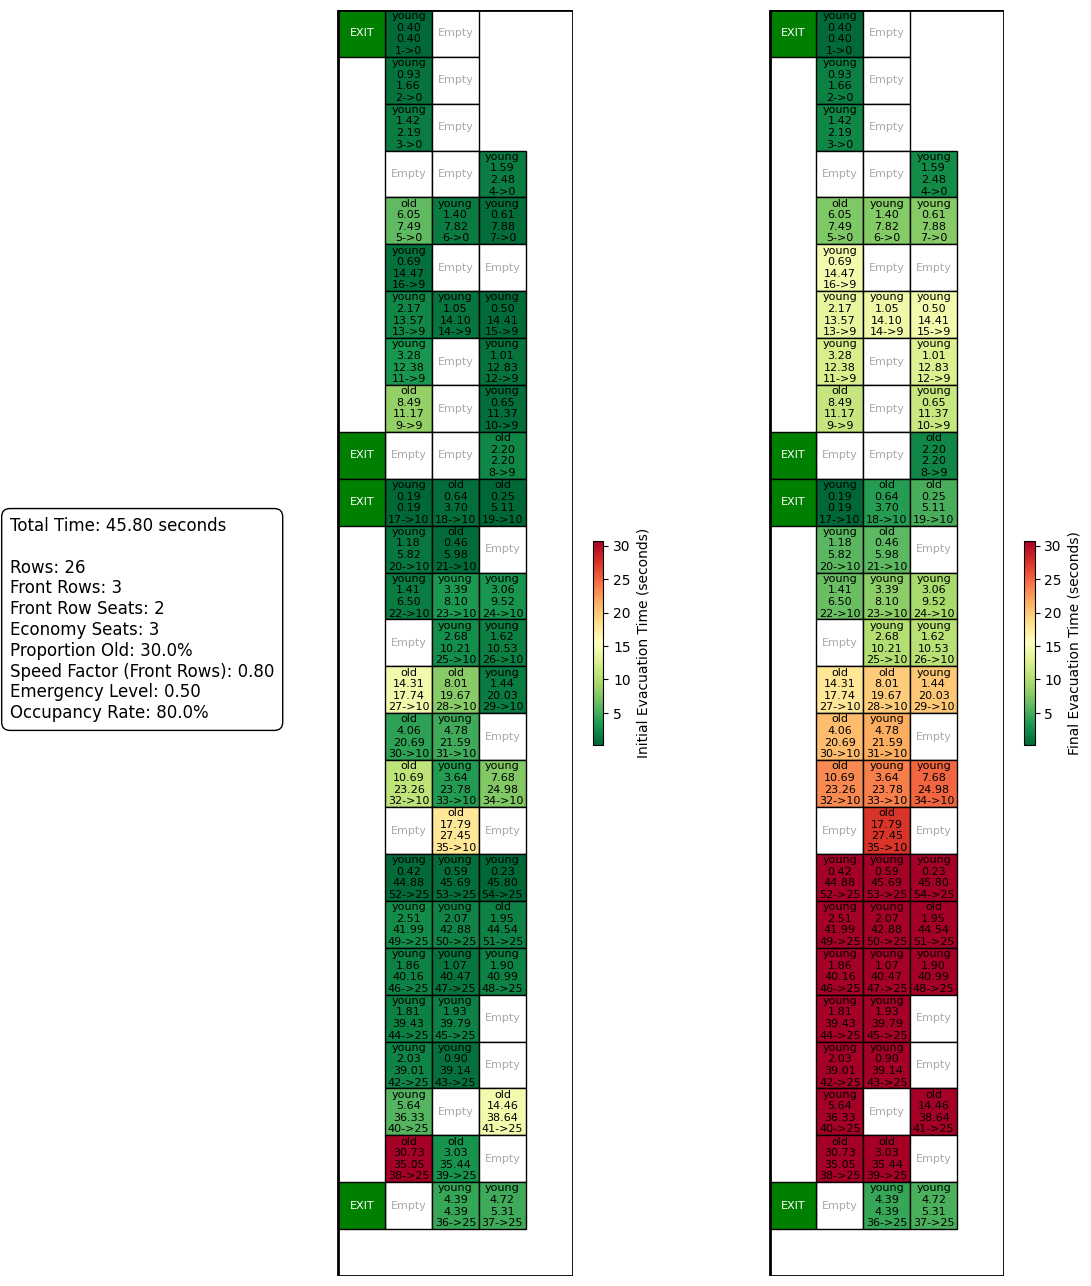

In [3]:
# A320 Configuration
rows = 26                    # Total rows in the plane
seats_per_row_front = 2       # Seats per row in first class/business class
seats_per_row = 3           # Seats per row in economy
front_rows = 3              # Number of rows in first class/business class
exits = [0, 9, 10, 25]      # Exit row positions

# Simulation parameters
speed_factor = 0.8          # Front rows move faster (80% of normal time)
proportion_old = 0.3        # 30% elderly passengers
emergency_level = 0.5       # Medium emergency (0.0-1.0)
occupancy_rate = 0.8        # 80% seats occupied

# Create and simulate plane
plane = Plane(rows=rows,
              seats_per_row=seats_per_row,
              exits=exits,
              speed_factor=speed_factor,
              proportion_old=proportion_old,
              emergency_level=emergency_level,
              occupancy_rate=occupancy_rate,
              seats_per_row_front=seats_per_row_front,
              front_rows=front_rows)

# Run simulation and visualize
plane.simulate_evacuation()
plane.draw_seatmap('both')

## Hypothesis 1. Increased proportion of slow-moving passengers significantly extends evacuation time due to slower movement


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


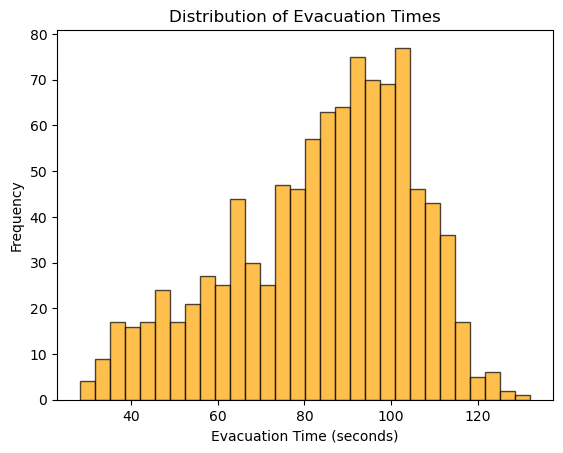

In [14]:
# A320 Configuration
rows = 26
seats_per_row_front = 2
seats_per_row = 3
front_rows = 3
exits = [0, 9, 10, 25]

# Simulation parameters
speed_factor = 0.8
proportion_old = 0.3
emergency_level = 0.5
occupancy_rate = 0.8
num_simulations = 1000

# Run simulations
evacuation_times = monte_carlo_simulation(
    rows=rows,
    seats_per_row=seats_per_row,
    seats_per_row_front=seats_per_row_front,
    front_rows=front_rows,
    exits=exits,
    speed_factor=speed_factor,
    num_simulations=num_simulations,
    proportion_old=proportion_old,
    emergency_level=emergency_level,
    occupancy_rate=occupancy_rate
)

# Analyze the results
average_time = np.mean(evacuation_times)
std_deviation = np.std(evacuation_times)

print(f"Average evacuation time: {average_time:.2f} seconds")
print(f"Standard deviation: {std_deviation:.2f} seconds")

# Plot the results
plt.hist(evacuation_times, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Evacuation Times')
plt.xlabel('Evacuation Time (seconds)')
plt.ylabel('Frequency')
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


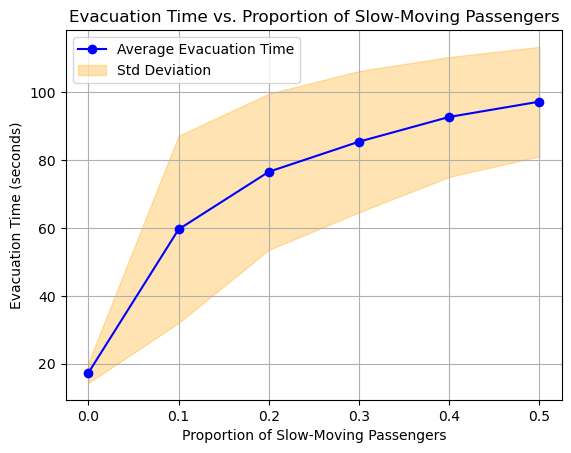

In [15]:
# A320 Configuration
rows = 26
seats_per_row_front = 2
seats_per_row = 3
front_rows = 3
exits = [0, 9, 10, 25]

# Simulation parameters
speed_factor = 0.8
emergency_level = 0.5
occupancy_rate = 0.8
num_simulations = 1000

proportions_of_old = [0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Different proportions of old passengers
average_times = []  # To store the average evacuation times for each proportion
std_deviations = []  # To store the standard deviations for each proportion
# Loop through different old passenger proportions
for proportion_old in proportions_of_old:

    # Run simulations
    evacuation_times = monte_carlo_simulation(
        rows=rows,
        seats_per_row=seats_per_row,
        seats_per_row_front=seats_per_row_front,
        front_rows=front_rows,
        exits=exits,
        speed_factor=speed_factor,
        num_simulations=num_simulations,
        proportion_old=proportion_old,
        emergency_level=emergency_level,
        occupancy_rate=occupancy_rate
    )
    # Calculate the average evacuation time and standard deviation
    average_time = np.mean(evacuation_times)
    std_deviation = np.std(evacuation_times)
    
    average_times.append(average_time)
    std_deviations.append(std_deviation)
    
    print(f"Proportion of Slow-Moving Passengers {proportion_old*100}% - Average Evacuation Time: {average_time:.2f} seconds, Standard Deviation: {std_deviation:.2f} seconds")

# Visualize the evacuation times for different slow-moving passenger proportions
plt.plot(proportions_of_old, average_times, marker='o', linestyle='-', color='b', label='Average Evacuation Time')
plt.fill_between(proportions_of_old, np.array(average_times) - np.array(std_deviations),
                 np.array(average_times) + np.array(std_deviations), color='orange', alpha=0.3, label='Std Deviation')
plt.title('Evacuation Time vs. Proportion of Slow-Moving Passengers')
plt.xlabel('Proportion of Slow-Moving Passengers')
plt.ylabel('Evacuation Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Simulated data (replace with real results from monte_carlo_simulation)
proportions_of_old = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
evacuation_times_all = []  # Collect all simulation results for each proportion

for proportion_old in proportions_of_old:
    evacuation_times = monte_carlo_simulation(
        rows=rows,
        seats_per_row=seats_per_row,
        seats_per_row_front=seats_per_row_front,
        front_rows=front_rows,
        exits=exits,
        speed_factor=speed_factor,
        num_simulations=num_simulations,
        proportion_old=proportion_old,
        emergency_level=emergency_level,
        occupancy_rate=occupancy_rate
    )
    evacuation_times_all.append(evacuation_times)

# Perform One-way ANOVA
anova_result = f_oneway(*evacuation_times_all)

print(f"ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Interpret the p-value
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in evacuation times across proportions")
else:
    print("Fail to reject the null hypothesis: No significant difference in evacuation times across proportions")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [17]:
# Generate an array of old passenger proportions
X = np.array(proportions_of_old)  # Old passenger proportions
X = sm.add_constant(X)  # Add constant term (intercept)
y = np.array(average_times)  # Average evacuation times

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Output the regression results
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     20.31
Date:                Tue, 10 Dec 2024   Prob (F-statistic):             0.0108
Time:                        21:35:49   Log-Likelihood:                -22.894
No. Observations:                   6   AIC:                             49.79
Df Residuals:                       4   BIC:                             49.37
Df Model:                           1                                         
Covariance Type:            nonrobust  

/Users/jimmy/opt/anaconda3/envs/NLP/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
